# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [6]:
df = pd.read_csv("states_edu.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'states_edu.csv'

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [ ]:
def pick_col(candidates):
    for c in candidates:
        if c in df.columns:
            return c
    raise KeyError(f"None of expected columns found: {candidates}\nHave: {list(df.columns)}")

STATE_COL = pick_col(["STATE", "State", "state"])
YEAR_COL  = pick_col(["YEAR", "Year", "year"])
TARGET_COL = pick_col([
    "NAEP_MATH_8_SCORE", "AVG_MATH_8_SCORE", "Grade 8 Math", "MATH_8_SCORE"
])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [13]:
# @@@ 1
# Your Code
df = pd.read_csv("../data/states_edu.csv")
def pick_col(candidates):
    for c in candidates:
        if c in df.columns:
            return c
    raise KeyError(f"None of expected columns found: {candidates}\nHave: {list(df.columns)}")
STATE_COL = pick_col(["STATE", "State", "state"])
YEAR_COL  = pick_col(["YEAR", "Year", "year"])
TARGET_COL = pick_col([
    "NAEP_MATH_8_SCORE", "AVG_MATH_8_SCORE", "Grade 8 Math", "MATH_8_SCORE"
])
num_years = df[YEAR_COL].nunique()
print("Number of unique years:", num_years)

Number of unique years: 33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [14]:
# @@@ 2
mi_name_candidates = ["MICHIGAN", "Michigan", "MI"]
oh_name_candidates = ["OHIO", "Ohio", "OH"]

def pick_state_name(cands):
    for s in cands:
        if s in df[STATE_COL].unique():
            return s
    if "STATE ABBREVIATION" in df.columns:
        for s in cands:
            if s in df["STATE ABBREVIATION"].unique():
                st = df.loc[df["STATE ABBREVIATION"] == s, STATE_COL].iloc[0]
                return st
    raise ValueError(f"None of {cands} found in {STATE_COL}")

MI = pick_state_name(mi_name_candidates)
OH = pick_state_name(oh_name_candidates)

avg_mi = df.loc[df[STATE_COL] == MI, TARGET_COL].mean(skipna=True)
avg_oh = df.loc[df[STATE_COL] == OH, TARGET_COL].mean(skipna=True)
higher_state = MI if avg_mi > avg_oh else OH
print(f"Average {TARGET_COL} — {MI}: {avg_mi:.2f}, {OH}: {avg_oh:.2f}. Higher: {higher_state}")

Average AVG_MATH_8_SCORE — MICHIGAN: 276.17, OHIO: 282.25. Higher: OHIO


Find the average for your chosen test across all states in 2019

In [15]:
# @@@ 3
avg_2019 = df.loc[df[YEAR_COL] == 2019, TARGET_COL].mean(skipna=True)
print(f"Average {TARGET_COL} across all states in 2019:", avg_2019)

Average AVG_MATH_8_SCORE across all states in 2019: 281.2641509433962


For each state, find a maximum value for your chosen test score

In [16]:
# @@@ 4
state_max = df.groupby(STATE_COL, dropna=False)[TARGET_COL].max()
print("Per-state max of target (head):")
print(state_max.sort_values(ascending=False).head(10))

Per-state max of target (head):
STATE
MASSACHUSETTS    301.0
NEW_JERSEY       296.0
NEW_HAMPSHIRE    296.0
MINNESOTA        295.0
VERMONT          295.0
MONTANA          293.0
NORTH_DAKOTA     293.0
DODEA            293.0
COLORADO         292.0
SOUTH_DAKOTA     291.0
Name: AVG_MATH_8_SCORE, dtype: float64


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [17]:
# @@@ 5
ENROLL_COL = None
for cand in ["ENROLL"]:
    if cand in df.columns:
        ENROLL_COL = cand
        break

TOT_EXP_COL = None
for cand in ["TOTAL_EXPENDITURE"]:
    if cand in df.columns:
        TOT_EXP_COL = cand
        break

PTR_COL = None
for cand in ["PUPIL_TEACHER_RATIO", "Pupil-Teacher Ratio", "AVG_RATIO"]:
    if cand in df.columns:
        PTR_COL = cand
        break

TOT_REV_COL = None
for cand in ["TOTAL_REVENUE"]:
    if cand in df.columns:
        TOT_REV_COL = cand
        break

READ8_COL = None
for cand in ["AVG_READING_8_SCORE"]:
    if cand in df.columns:
        READ8_COL = cand
        break

# Create engineered features where possible
if ENROLL_COL and TOT_EXP_COL:
    df["EXPENDITURE_PER_STUDENT"] = pd.to_numeric(df[TOT_EXP_COL], errors="coerce") / pd.to_numeric(df[ENROLL_COL], errors="coerce")

if ENROLL_COL and TOT_REV_COL:
    df["REVENUE_PER_STUDENT"] = pd.to_numeric(df[TOT_REV_COL], errors="coerce") / pd.to_numeric(df[ENROLL_COL], errors="coerce")


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

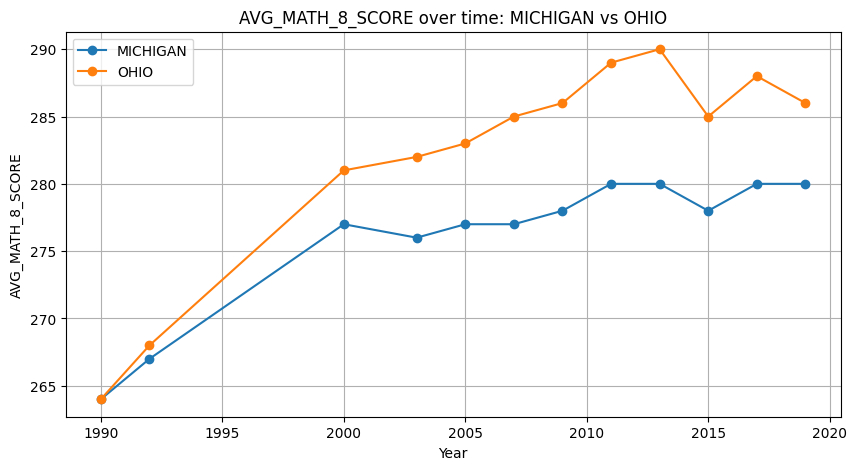

In [ ]:
# @@@ 6
plot_df = df.loc[df[STATE_COL].isin([MI, OH]), [STATE_COL, YEAR_COL, TARGET_COL]].dropna()
plt.figure(figsize=(10,5))
for st in [MI, OH]:
    sub = plot_df[plot_df[STATE_COL] == st].sort_values(YEAR_COL)
    plt.plot(sub[YEAR_COL], sub[TARGET_COL], marker="o", label=st)
plt.title(f"{TARGET_COL} over time: {MI} vs {OH}")
plt.xlabel("Year")
plt.ylabel(TARGET_COL)
plt.legend()
plt.grid(True)
plt.show()

# Michigan and Ohio show similar long-term trajectories in Grade 8 Math; the line plot highlights year-to-year fluctuations and how Ohio consistently outperforms Michigan.


**<CAPTION FOR VIZ 1>**

**Visualization 2**

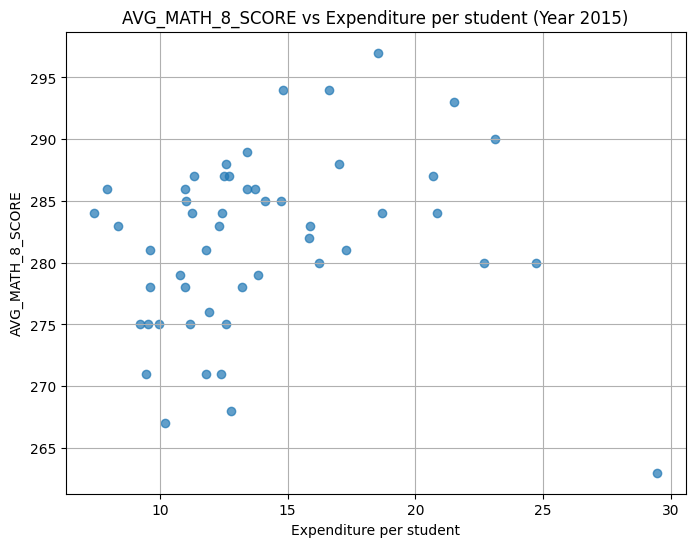

In [19]:
# @@@ 7
viz_cols = [TARGET_COL, YEAR_COL, STATE_COL, "EXPENDITURE_PER_STUDENT"]
scat = df.dropna(subset=[c for c in viz_cols if c in df.columns]).copy()
if YEAR_COL in scat.columns:
    latest_year = scat[YEAR_COL].max()
    scat = scat[scat[YEAR_COL] == latest_year]

plt.figure(figsize=(8,6))
if "EXPENDITURE_PER_STUDENT" in scat.columns and not scat.empty:
    plt.scatter(scat["EXPENDITURE_PER_STUDENT"], scat[TARGET_COL], alpha=0.7)
    plt.xlabel("Expenditure per student")
    plt.ylabel(TARGET_COL)
    plt.title(f"{TARGET_COL} vs Expenditure per student (Year {int(latest_year) if len(scat) else ''})")
    plt.grid(True)
    plt.show()
else:
    print("EXPENDITURE_PER_STUDENT not available for scatter; skipping plot.")


# States with higher per-student spending tend to cluster toward higher Grade 8 Math scores, though the relationship is noisy—suggesting other factors also matter.


**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
# @@@ 8
candidate_features = [
    "EXPENDITURE_PER_STUDENT",
    "REVENUE_PER_STUDENT",
    PTR_COL,
    READ8_COL,                # related subject score
]

# Keep only features that exist
features = [c for c in candidate_features if c and c in df.columns]

# Filter to last ~10 years of data with target present
if df[YEAR_COL].notna().any():
    recent_year = int(df[YEAR_COL].max())
    df_model = df[(df[YEAR_COL] >= recent_year - 10)]
else:
    df_model = df.copy()

df_model = df_model.dropna(subset=[TARGET_COL] + features)
X  = df_model[features].copy()
y = df_model[TARGET_COL].astype(float)

In [29]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [40]:
# @@@ 10
# import your sklearn class here
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [41]:
# @@@ 11
# create your model here
model = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("reg", LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [42]:
model.fit(X_train, y_train)

,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [43]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [44]:
# @@@ 12
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"Test MAE: {mae:.2f}")
print(f"Test R^2: {r2:.3f}")

Test MAE: 2.55
Test R^2: 0.850


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Plotting predictor: EXPENDITURE_PER_STUDENT


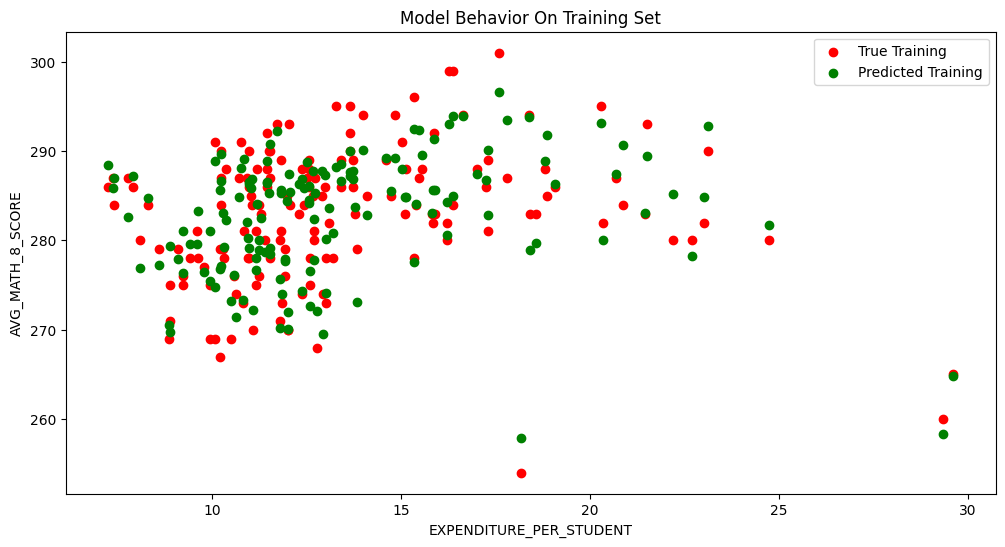

In [45]:
# @@@ 13

col_name = features[0] if features else None
print("Plotting predictor:", col_name)

if col_name:
    f = plt.figure(figsize=(12,6))
    plt.scatter(X_train[col_name], y_train, color = "red")
    plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

    plt.legend(['True Training','Predicted Training'])
    plt.xlabel(col_name)
    plt.ylabel(TARGET_COL)
    plt.title("Model Behavior On Training Set")
    plt.show()

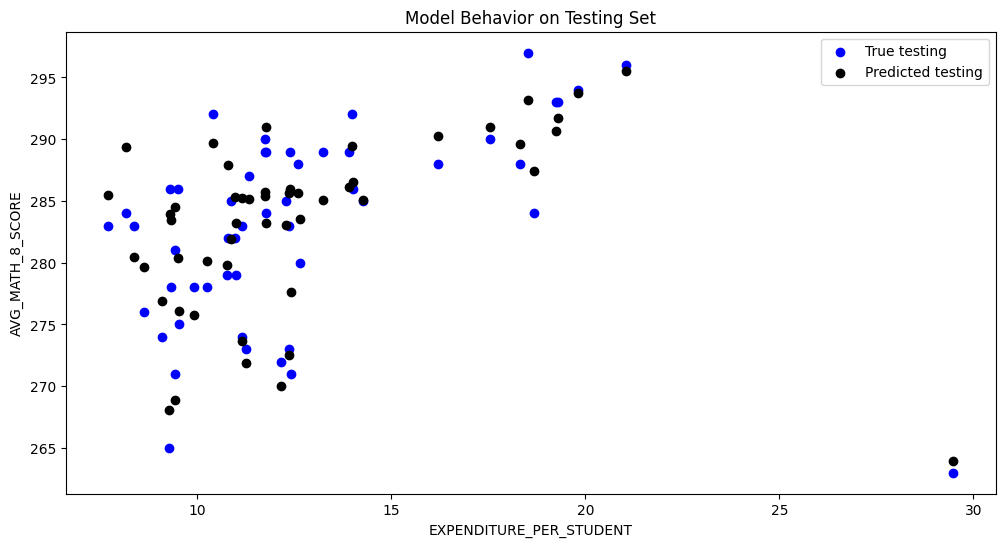

In [46]:
# @@@ 14

if col_name:
    f = plt.figure(figsize=(12,6))
    plt.scatter(X_test[col_name], y_test, color = "blue")
    plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

    plt.legend(['True testing','Predicted testing'])
    plt.xlabel(col_name)
    plt.ylabel(TARGET_COL)
    plt.title("Model Behavior on Testing Set")
    plt.show()
